In [19]:
#Assignment 4: Building a model of Neural Networks with the help of Keras on MNIST dataset. 

#let's import the essential libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
#We'll use keras.datasets to download the MNIST dataset. Do check out the other datasets available there
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
train_images.shape #there are 60,000 training samples 

(60000, 28, 28)

In [22]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [23]:
#It's time to build our model. 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),#This time let's add only one hidden layer. We'll increase it later
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #as the number of digits/ classes are 10 
])

In [24]:
# we will compile the model with adam optimizer, and we are using sparse_categorical_crossentropy as the loss. 
# check out what are the other available loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history=model.fit(train_images, train_labels, epochs=10, validation_split=0.15) # this step will help you to train your model
#So, we'll add 25% validation to check for overfitting, however you can remove validation
# model.fit will return [loss, accuracy] if there is no validation
# and [loss, val_loss, acc,val_acc] if we validate our model

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 8s 155us/sample - loss: 0.2863 - acc: 0.9185 - val_loss: 0.1346 - val_acc: 0.9614
Epoch 2/10
51000/51000 [==============================] - 7s 142us/sample - loss: 0.1268 - acc: 0.9626 - val_loss: 0.1107 - val_acc: 0.9673
Epoch 3/10
51000/51000 [==============================] - 7s 137us/sample - loss: 0.0866 - acc: 0.9741 - val_loss: 0.1020 - val_acc: 0.9681
Epoch 4/10
51000/51000 [==============================] - 7s 132us/sample - loss: 0.0658 - acc: 0.9796 - val_loss: 0.0838 - val_acc: 0.9750
Epoch 5/10
51000/51000 [==============================] - 7s 130us/sample - loss: 0.0506 - acc: 0.9847 - val_loss: 0.0902 - val_acc: 0.9743
Epoch 6/10
51000/51000 [==============================] - 7s 143us/sample - loss: 0.0389 - acc: 0.9881 - val_loss: 0.0826 - val_acc: 0.9764
Epoch 7/10
51000/51000 [==============================] - 7s 136us/sample - loss: 0.0313 - acc: 0.9903 - val_lo

In [26]:
# time to test your model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

# your required code is upto this line. Now it's time for a little bit experimentation and fun !!

10000/10000 [==============================] - 1s 57us/sample - loss: 0.0900 - acc: 0.9774
Test accuracy: 0.9774


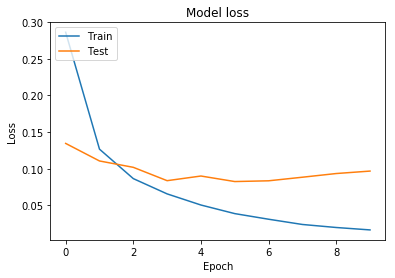

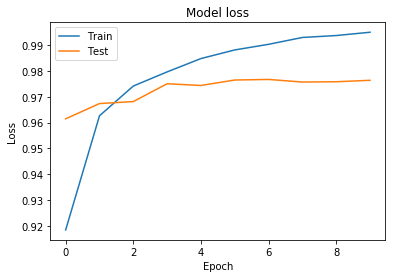

In [27]:
# if you want to visualize the model, you can plot the loss and accuracy over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
#Now let's add one more layer and observe the output. 
#As you go on increasing the number of hidden layers, the model will tend to overfit. 


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history= model.fit(train_images, train_labels, epochs=10, validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 8s 160us/sample - loss: 0.2491 - acc: 0.9273 - val_loss: 0.1315 - val_acc: 0.9617
Epoch 2/10
51000/51000 [==============================] - 7s 145us/sample - loss: 0.1045 - acc: 0.9693 - val_loss: 0.0980 - val_acc: 0.9681
Epoch 3/10
51000/51000 [==============================] - 7s 146us/sample - loss: 0.0724 - acc: 0.9775 - val_loss: 0.1026 - val_acc: 0.9692
Epoch 4/10
51000/51000 [==============================] - 7s 146us/sample - loss: 0.0558 - acc: 0.9824 - val_loss: 0.0869 - val_acc: 0.9748
Epoch 5/10
51000/51000 [==============================] - 7s 146us/sample - loss: 0.0426 - acc: 0.9861 - val_loss: 0.1005 - val_acc: 0.9746
Epoch 6/10
51000/51000 [==============================] - 8s 155us/sample - loss: 0.0352 - acc: 0.9882 - val_loss: 0.0912 - val_acc: 0.9748
Epoch 7/10
51000/51000 [==============================] - 8s 151us/sample - loss: 0.0300 - acc: 0.9897 - val_lo

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0960 - acc: 0.9748
Test accuracy: 0.9748


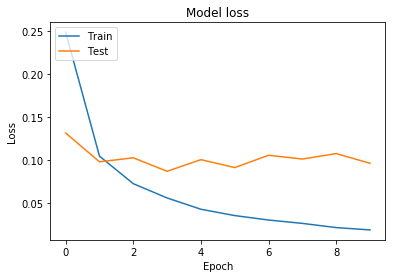

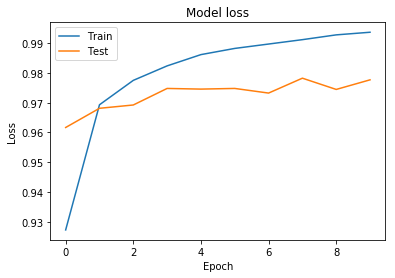

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
#Now let's add three more layer and observe the output. 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=10, validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 12s 230us/sample - loss: 0.2724 - acc: 0.9155 - val_loss: 0.1294 - val_acc: 0.9643
Epoch 2/10
51000/51000 [==============================] - 10s 201us/sample - loss: 0.1229 - acc: 0.9633 - val_loss: 0.1109 - val_acc: 0.9674
Epoch 3/10
51000/51000 [==============================] - 10s 189us/sample - loss: 0.0923 - acc: 0.9724 - val_loss: 0.1017 - val_acc: 0.9716
Epoch 4/10
51000/51000 [==============================] - 10s 189us/sample - loss: 0.0736 - acc: 0.9776 - val_loss: 0.1015 - val_acc: 0.9711
Epoch 5/10
51000/51000 [==============================] - 10s 190us/sample - loss: 0.0612 - acc: 0.9819 - val_loss: 0.0976 - val_acc: 0.9749
Epoch 6/10
51000/51000 [==============================] - 10s 191us/sample - loss: 0.0503 - acc: 0.9847 - val_loss: 0.0859 - val_acc: 0.9764
Epoch 7/10
51000/51000 [==============================] - 11s 208us/sample - loss: 0.0432 - acc: 0.9865 -

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 82us/sample - loss: 0.1051 - acc: 0.9740
Test accuracy: 0.974


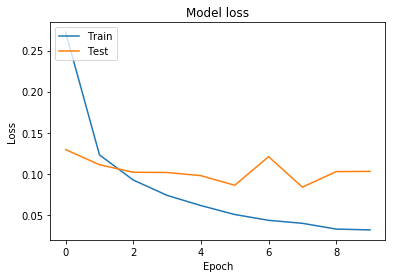

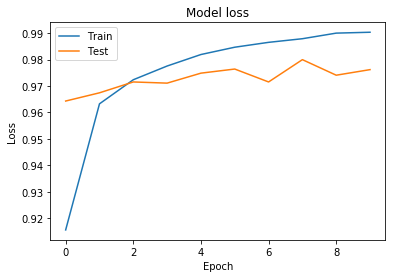

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()